In [1]:
import pandas as pd
import numpy as np
import sklearn as sn
import matplotlib.pyplot as plt
import pylab as pl
from sklearn import preprocessing

In [2]:
#read data
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

### Data visualization and analysis

array([[<AxesSubplot:title={'center':'age'}>]], dtype=object)

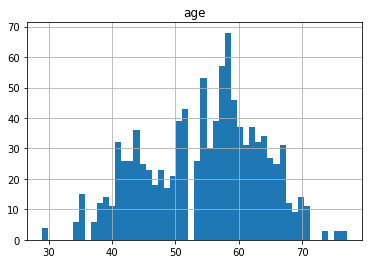

In [9]:
df.hist(column='age', bins= 50)

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [11]:
x= df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']].values
x[0:5]

array([[ 52. ,   1. ,   0. , 125. , 212. ,   0. ,   1. , 168. ,   0. ,
          1. ,   2. ,   2. ,   3. ],
       [ 53. ,   1. ,   0. , 140. , 203. ,   1. ,   0. , 155. ,   1. ,
          3.1,   0. ,   0. ,   3. ],
       [ 70. ,   1. ,   0. , 145. , 174. ,   0. ,   1. , 125. ,   1. ,
          2.6,   0. ,   0. ,   3. ],
       [ 61. ,   1. ,   0. , 148. , 203. ,   0. ,   1. , 161. ,   0. ,
          0. ,   2. ,   1. ,   3. ],
       [ 62. ,   0. ,   0. , 138. , 294. ,   1. ,   1. , 106. ,   0. ,
          1.9,   1. ,   3. ,   2. ]])

In [12]:
y= df['target'].values
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

### Normalize Data

In [13]:
#define our scaler
print (x[0:5])
scaler= preprocessing.StandardScaler().fit(x)
x= scaler.transform(x.astype(float))
x[0:5]

[[ 52.    1.    0.  125.  212.    0.    1.  168.    0.    1.    2.    2.
    3. ]
 [ 53.    1.    0.  140.  203.    1.    0.  155.    1.    3.1   0.    0.
    3. ]
 [ 70.    1.    0.  145.  174.    0.    1.  125.    1.    2.6   0.    0.
    3. ]
 [ 61.    1.    0.  148.  203.    0.    1.  161.    0.    0.    2.    1.
    3. ]
 [ 62.    0.    0.  138.  294.    1.    1.  106.    0.    1.9   1.    3.
    2. ]]


array([[-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
        -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
         0.99543334,  1.20922066,  1.08985168],
       [-0.15815703,  0.66150409, -0.91575542,  0.4791073 , -0.83386117,
         2.38733039, -1.00404855,  0.2559679 ,  1.40392824,  1.72713707,
        -2.24367514, -0.73197147,  1.08985168],
       [ 1.71659547,  0.66150409, -0.91575542,  0.76468824, -1.39623266,
        -0.41887792,  0.89125488, -1.04869198,  1.40392824,  1.30141672,
        -2.24367514, -0.73197147,  1.08985168],
       [ 0.72407944,  0.66150409, -0.91575542,  0.93603681, -0.83386117,
        -0.41887792,  0.89125488,  0.51689988, -0.71228712, -0.91232909,
         0.99543334,  0.23862459,  1.08985168],
       [ 0.834359  , -1.51170646, -0.91575542,  0.36487493,  0.93082177,
         2.38733039,  0.89125488, -1.87497657, -0.71228712,  0.70540823,
        -0.6241209 ,  2.17981673, -0.52212231]])

In [14]:
#spliting data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y , test_size= 0.2 , random_state= 4)
print ('Train set: ', x_train.shape, y_train.shape)
print ('Test set:', x_test.shape, y_test.shape)

Train set:  (820, 13) (820,)
Test set: (205, 13) (205,)


### Classification

#### K nearest neighbor (KNN)

In [15]:
#import library
from sklearn.neighbors import KNeighborsClassifier

In [16]:
k=3
myclassifier = KNeighborsClassifier(n_neighbors = k).fit(x_train , y_train)
myclassifier

KNeighborsClassifier(n_neighbors=3)

## Prediction

In [17]:
y_hat = myclassifier.predict(x_test)
y_hat[0:5]

array([1, 1, 0, 0, 1], dtype=int64)

## Accuracy avaluation

In [18]:
from sklearn import metrics
print ('Train set accuracy: ', metrics.accuracy_score(y_train , myclassifier.predict(x_train)))
print ('Test set accuracy: ', metrics.accuracy_score(y_test , myclassifier.predict(x_test)))       

Train set accuracy:  0.9963414634146341
Test set accuracy:  0.9658536585365853


In [19]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    myclassifier = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=myclassifier.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 0.9902439 , 0.96585366, 0.90243902, 0.86341463,
       0.87317073, 0.83902439, 0.82926829, 0.83414634])

#### Plot the model accuracy for a different number of neighbors

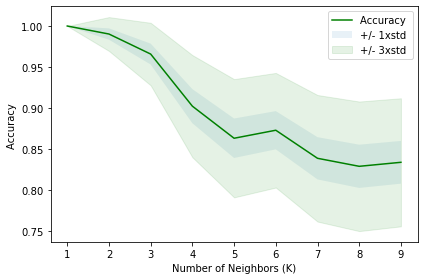

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [21]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
myclassifier.predict_proba(x_test)

Prediction Probabilities


array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.44444444, 0.55555556],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.55555556, 0.44444444],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.77777778, 0.22222222],
       [0.22222222, 0.77777778],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.11111111, 0.88888889],
       [0.33333333, 0.66666667],
       [0.55555556, 0.44444444],
       [0.22222222, 0.77777778],
       [1.

In [22]:
import pickle
 
# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(myclassifier)
 
# Then we will be loading that saved model
myclassifier_from_pickle = pickle.loads(saved_model)
 
# lastly, after loading that model we will use this to make predictions
myclassifier_from_pickle.predict(x_test)

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0], dtype=int64)